# Tutorial 2: Populations and Sampling

### Lecture and Tutorial Learning Goals
After completing this week's lecture and tutorial work, you will be able to:

1. Compare and contrast quantitative and categorical variables.
2. Explain random and representative sampling and how this can influence estimation.
3. Define random variables and explain how they relate to sampling.
4. Define standard error and explain its purpose.
5. Compare and contrast population distribution, sample distribution and an estimator's sampling distribution.
6. Explain what a sampling distribution is, list its properties, and its purpose in statistical inference.

In [1]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(lubridate)
library(repr)
library(tidyverse)
source("tests_tutorial_02.R")


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Warning message:
“package ‘infer’ was built under R version 4.0.2”

Attaching package: ‘lubridate’


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“packag

## 1. Warm-Up Questions

Here are a few questions to get you warmed up before we dive into the tutorial.

**Question 1.0**
<br>{points: 1}

Suppose you are given a random sample of the heights of 100 different trees planted in Vancouver. You are asked to calculate the variance of the sample, which will be used as a point estimate of the variance of the height of all trees in Vancouver.

True or false?

Your point estimate could be considered the outcome of a random variable.

_Assign your answer to an object called `answer1.0`. Your answer should be either "true" or "false", surrounded by quotes._

In [2]:
# answer1.0 <- ...

# your code here
answer1.0 <- "true"

In [3]:
test_1.0()

[1] "Success!"


**Question 1.1**
<br>{points: 1}

Consider the following 20 values:

```
-2	 7	-7	-10	 0
 4	-7	 5	 10	 9
 9	 6	-3	  2	 1
 4	 1	 2	  7	-9
```

What is the proportion of the values that are **less than or equal to 0**?

_Assign your answer to an object called `answer1.1`. Your answer should be a single number._

In [6]:
# answer1.1 <- ...

# your code here
answer1.1 <- 7/20
answer1.1

[1] 0.35

In [7]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br>{points: 1}

In which scenario(s) would it **not** be logical to calculate the mean of the data collected?

A. You record the length of each word on a single page in a book.

B. You record the colour of each vehicle parked along one side of a block in downtown Vancouver.

C. You record the time that it takes for you sprint 100m on 10 different days.

D. You record the number of students using laptops during each of the first 5 days of your math class.

E. None of the above

_Assign your answer to an object called `answer1.2`. Your answer should be a single character surrounded by quotes._

In [8]:
# answer1.2 <- ...

# your code here
answer1.2 <- "B"

In [9]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br>{points: 1}

True or false?

An estimator is a random variable whose distribution is the sampling distribution for a particular sample size and population parameter.

In [10]:
# answer1.3 <- ...

# your code here
answer1.3 <- "true"

In [11]:
test_1.3()

[1] "Success!"


## 2. Influence of Sample Size

Recall that in the last worksheet, we took a look at how the size of our virtual samples can affect the shape of the sampling distributions that they produce. In this tutorial, we are going to continue looking at these trends in a bit more depth.

To do this, we will be using the `apt_buildings` dataset from the `datateachr` package. Unlike the other dataset that we have worked with from this package, `vancouver_trees`, this dataset originates from Toronto. Here is a bit more information about it from the documentation (which you can access yourself using `?apt_buildings`):
> This dataset contains Toronto apartment building information for buildings that are registered in the Apartment Building Standard (ABS) program. The information was collected from building owners/managers during the initial registration process. 

![](https://media.giphy.com/media/Ru86ce44TU4A8/giphy.gif)
<div style="text-align: center"><i>Image from <a href="https://media.giphy.com/media/Ru86ce44TU4A8/giphy.gif">giphy.com</i></a></div>

As this dataset contains information about all apartments registered in the ABS program, we can consider it as a finite population. Hence, to solidify our understanding of the influence of sampling size on sampling distributions, we will take a look at the **sampling distribution of sample variance** for the **age (in years)** of our population apartment buildings in Toronto that are registered in the ABS program.

In [12]:
# Run this cell before continuing.
colnames(apt_buildings)

[1] "id"                               "air_conditioning"                
 [3] "amenities"                        "balconies"                       
 [5] "barrier_free_accessibilty_entr"   "bike_parking"                    
 [7] "exterior_fire_escape"             "fire_alarm"                      
 [9] "garbage_chutes"                   "heating_type"                    
[11] "intercom"                         "laundry_room"                    
[13] "locker_or_storage_room"           "no_of_elevators"                 
[15] "parking_type"                     "pets_allowed"                    
[17] "prop_management_company_name"     "property_type"                   
[19] "rsn"                              "separate_gas_meters"             
[21] "separate_hydro_meters"            "separate_water_meters"           
[23] "site_address"                     "sprinkler_system"                
[25] "visitor_parking"                  "ward"                            
[27] "window_type"                      "year_built"                      
[29] "year_registered"                  "no_of_storeys"                   
[31] "emergency_power"                  "non-smoking_building"            
[33] "no_of_units"                      "no_of_accessible_parking_spaces" 
[35] "facilities_available"             "cooling_room"                    
[37] "no_barrier_free_accessible_units"

Taking a look at the list of columns in the `apt_buildings` dataset that has been printed above, it appears there is no column describing age; we must create one ourselves.

**Question 2.0** 
<br> {points: 1}

Use the scaffolding in the code cell below to add a new `age_yrs` column (which should describe be the age in **years** of each building) to `apt_buildings`, and then select only that new column. Afterwards, filter out rows that contain `NA` values.

_**Note:** `Sys.Date()` is a function that returns a `date-time` object describing the current time, and `year()` is a function that gets the year from a `date-time` object. Hence, `year(Sys.Date())` is the current year._

_**Hint:** check the list of column names above to see which column you need to use to calculate `age_yrs`._

_Assign your data frame to an object called `apt_ages`._

In [14]:
# apt_ages <- 
#    apt_buildings %>% 
#    ...(... = year(Sys.Date()) - ...) %>%    
#    select(...) %>% 
#    ...(...)

# your code here
apt_ages <- apt_buildings %>%
            mutate(age_yrs=year(Sys.Date())-year_built) %>%
            select(age_yrs) %>%
            filter(!is.na(age_yrs))
head(apt_ages)

age_yrs
<dbl>
54
51
94
62
78
69


In [15]:
test_2.0()

[1] "Success!"


**Question 2.1**
<br> {points: 1}

Visualize the population distribution by creating a histogram with bin widths of 10 using `geom_histogram`. Add a title to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `apt_age_dist`._

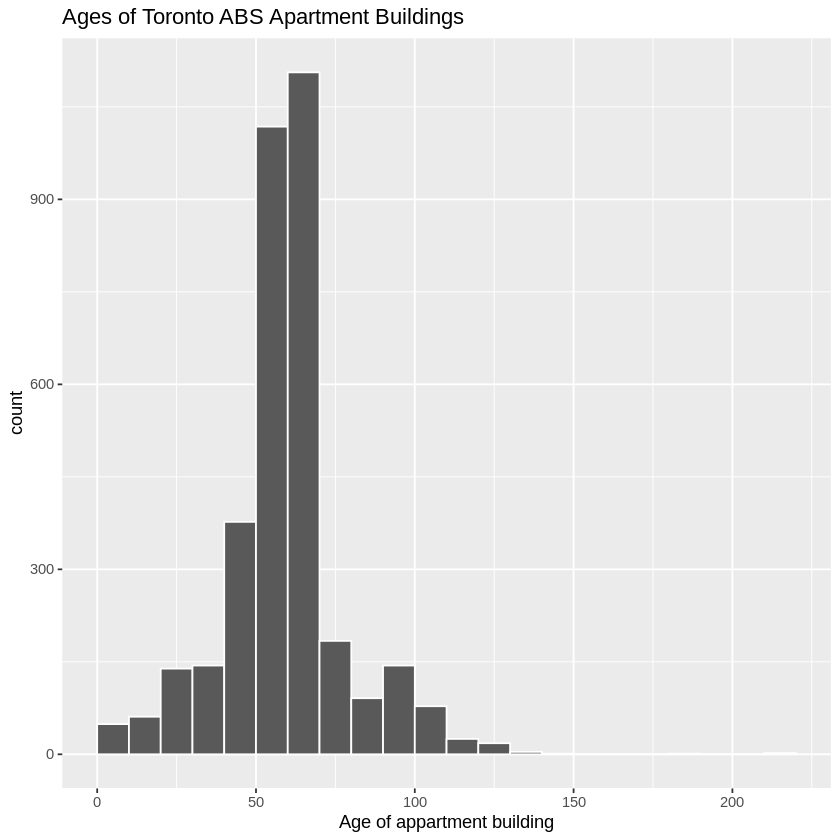

In [16]:
# apt_age_dist <- 
#    apt_ages %>% 
#    ggplot(aes(x = ...)) +
#    ...(... = ..., boundary = 0, color = 'white') +
#    ...("Ages of Toronto ABS Apartment Buildings") +
#    ...("...")

# your code here
apt_age_dist <- apt_ages %>% 
        ggplot(aes(x = age_yrs)) +
        geom_histogram(binwidth = 10, boundary = 0, color = 'white') +
        ggtitle("Ages of Toronto ABS Apartment Buildings") +
        xlab("Age of appartment building")
apt_age_dist

In [17]:
test_2.1()

[1] "Success!"


**Question 2.2**
<br> {points: 3}

Let the $X$ be the age (in years) of a randomly selected apartment from the population of interest (all apartments in Toronto that are registered in the ABS program). Is it more likely that $X \leq 25$ or $X \geq 75$? Justify your answer in 1-2 sentences.

It is more likely that X is greater than or equal to 75 because, looking at the histogram, the summed area of all blocks greater than or equal to 75 are greater than the summed area of blockes less than or equal to 25.

**Question 2.3**
<br> {points: 1}

Use the `rep_sample_n` function to take 2000 samples of size 10 from the population `apt_ages`. Use the seed `3735`. Then, calculate the variance of each sample; name the column containing the sample variances `sample_var`. Your final data frame should have two columns: `replicate` and `sample_var`.

_Assign your data frame to an object called `sample_vars_10x2000`._

In [20]:
set.seed(3735) # DO NOT CHANGE!

# your code here
sample_vars_10x2000 <- apt_ages %>%
                rep_sample_n(size=10, reps=2000) %>%
                group_by(replicate) %>%
                summarize(sample_var=var(age_yrs))


head(sample_vars_10x2000)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_var
<int>,<dbl>
1,60.71111
2,310.71111
3,166.04444
4,193.77778
5,129.28889
6,200.45556


In [21]:
test_2.3()

[1] "Success!"


**Question 2.4**
<br> {points: 1}

Visualize the distribution of the sample variances that you calculated in the previous question by plotting a histogram with bin widths of 80 using `geom_histogram`. Add a title of "size = 10, 2000 reps" to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `sampling_dist_10x2000`._

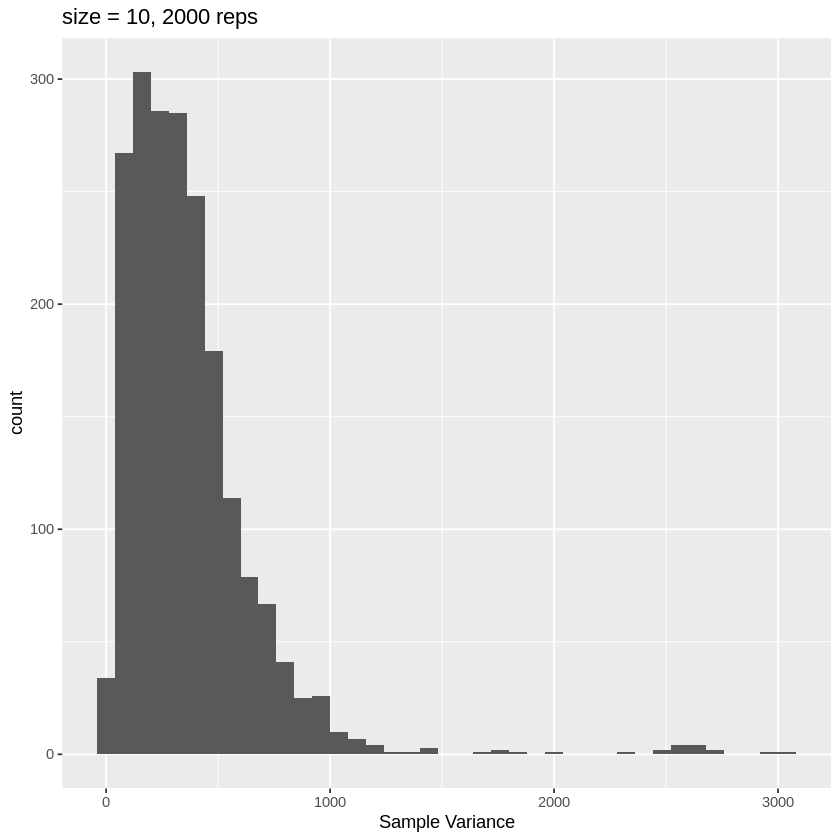

In [23]:
# sampling_dist_10x2000 <- 
#    ... %>% 
#    ...(aes(x = sample_var)) +
#    ...(binwidth = ...) +
#    ggtitle(...) +
#    ...(...)

# your code here
sampling_dist_10x2000 <- 
    sample_vars_10x2000 %>% 
    ggplot(aes(x = sample_var)) +
    geom_histogram(binwidth = 80) +
    ggtitle("size = 10, 2000 reps") +
    xlab("Sample Variance")

sampling_dist_10x2000

In [24]:
test_2.4()

[1] "Success!"


**Question 2.5**
<br> {points: 1}

Using the same strategy as you did in **question 2.2**, draw 2000 random samples of size 50 from the population `apt_ages`. Use the seed `4623`. Then, for each sample, calculate the sample variance. Finally, visualize the distribution of the sample variances you just calculated by plotting a histogram with bin widths of 60 using `geom_histogram`. Add a title of "size = 50, 2000 reps" to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `sampling_dist_50x2000`._

`summarise()` ungrouping output (override with `.groups` argument)



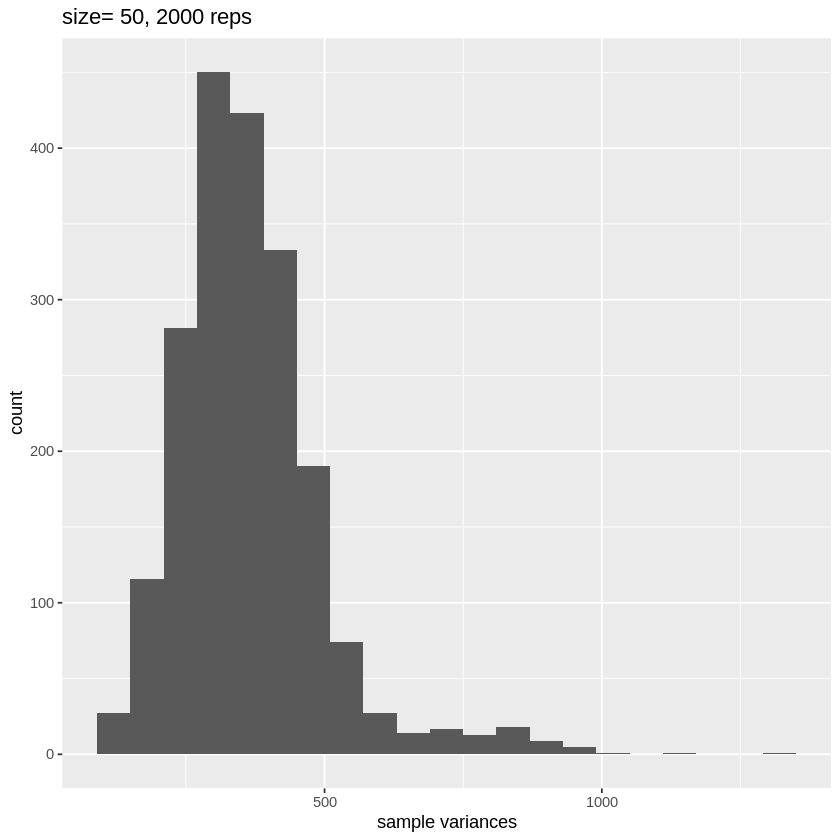

In [28]:
set.seed(4623) # DO NOT CHANGE!

# your code here
sampling_dist_50x2000 <- apt_ages %>%
            rep_sample_n(size=50, reps=2000) %>%
            group_by(replicate) %>%
            summarize(sample_var = var(age_yrs)) %>%
            ggplot(aes(x=sample_var)) +
            geom_histogram(binwidth=60) +
            ggtitle("size= 50, 2000 reps")+
            xlab("sample variances")

sampling_dist_50x2000

In [29]:
test_2.5()

[1] "Success!"


**Question 2.6**
<br> {points: 1}

Using the same strategy as you did in **question 2.2**, draw 2000 random samples of size 150 from the population `apt_ages`. Use the seed `8614`. Then, for each sample, calculate the sample variance. Finally, visualize the distribution of the sample variances you just calculated by plotting a histogram with bin widths of 30 using `geom_histogram`. Add a title of "size = 150, 2000 reps" to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `sampling_dist_150x2000`._

`summarise()` ungrouping output (override with `.groups` argument)



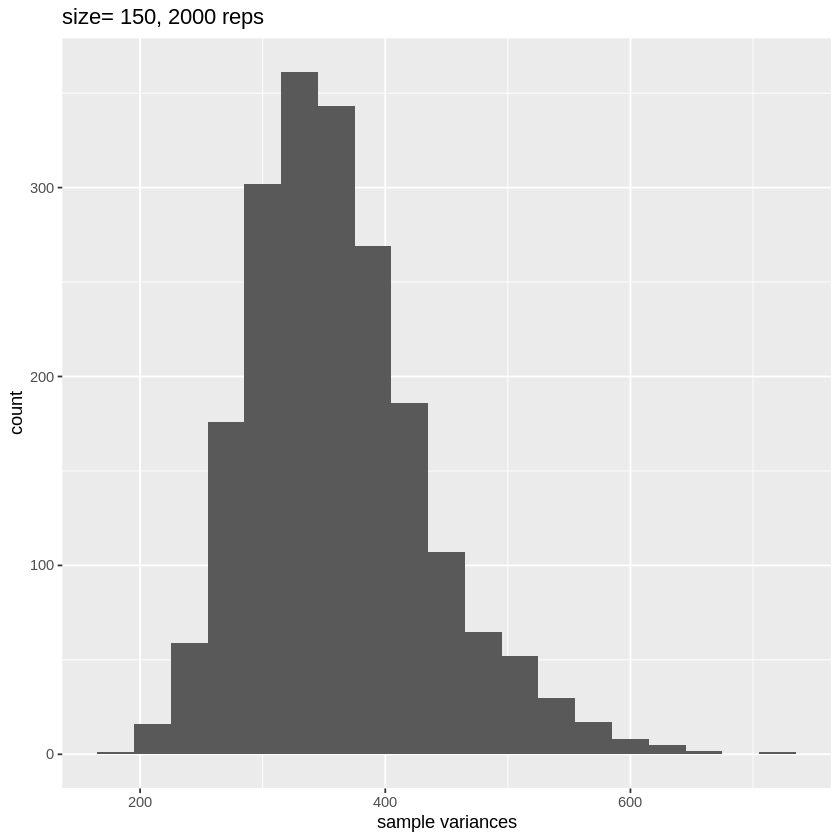

In [30]:
set.seed(8614)

# your code here
sampling_dist_150x2000 <- apt_ages %>%
            rep_sample_n(size=150, reps=2000) %>%
            group_by(replicate) %>%
            summarize(sample_var = var(age_yrs)) %>%
            ggplot(aes(x=sample_var)) +
            geom_histogram(binwidth=30) +
            ggtitle("size= 150, 2000 reps")+
            xlab("sample variances")
sampling_dist_150x2000

In [31]:
test_2.6()

[1] "Success!"


_Use the set of plots below to answer the **next 2 questions**. Some of the code may be confusing, but you do not need to understand the code to answer the questions._

In the code cell below, we have used `plot_grid` to plot the three sampling distributions side-by-side. We have sorted the plots by increasing order of sample size from left to right.

**Note**: a small number of the sample variances are not visible because we manually set bounds on the x-axis so you can compare the distributions more easily (this causes the warnings you observe below).

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 25 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


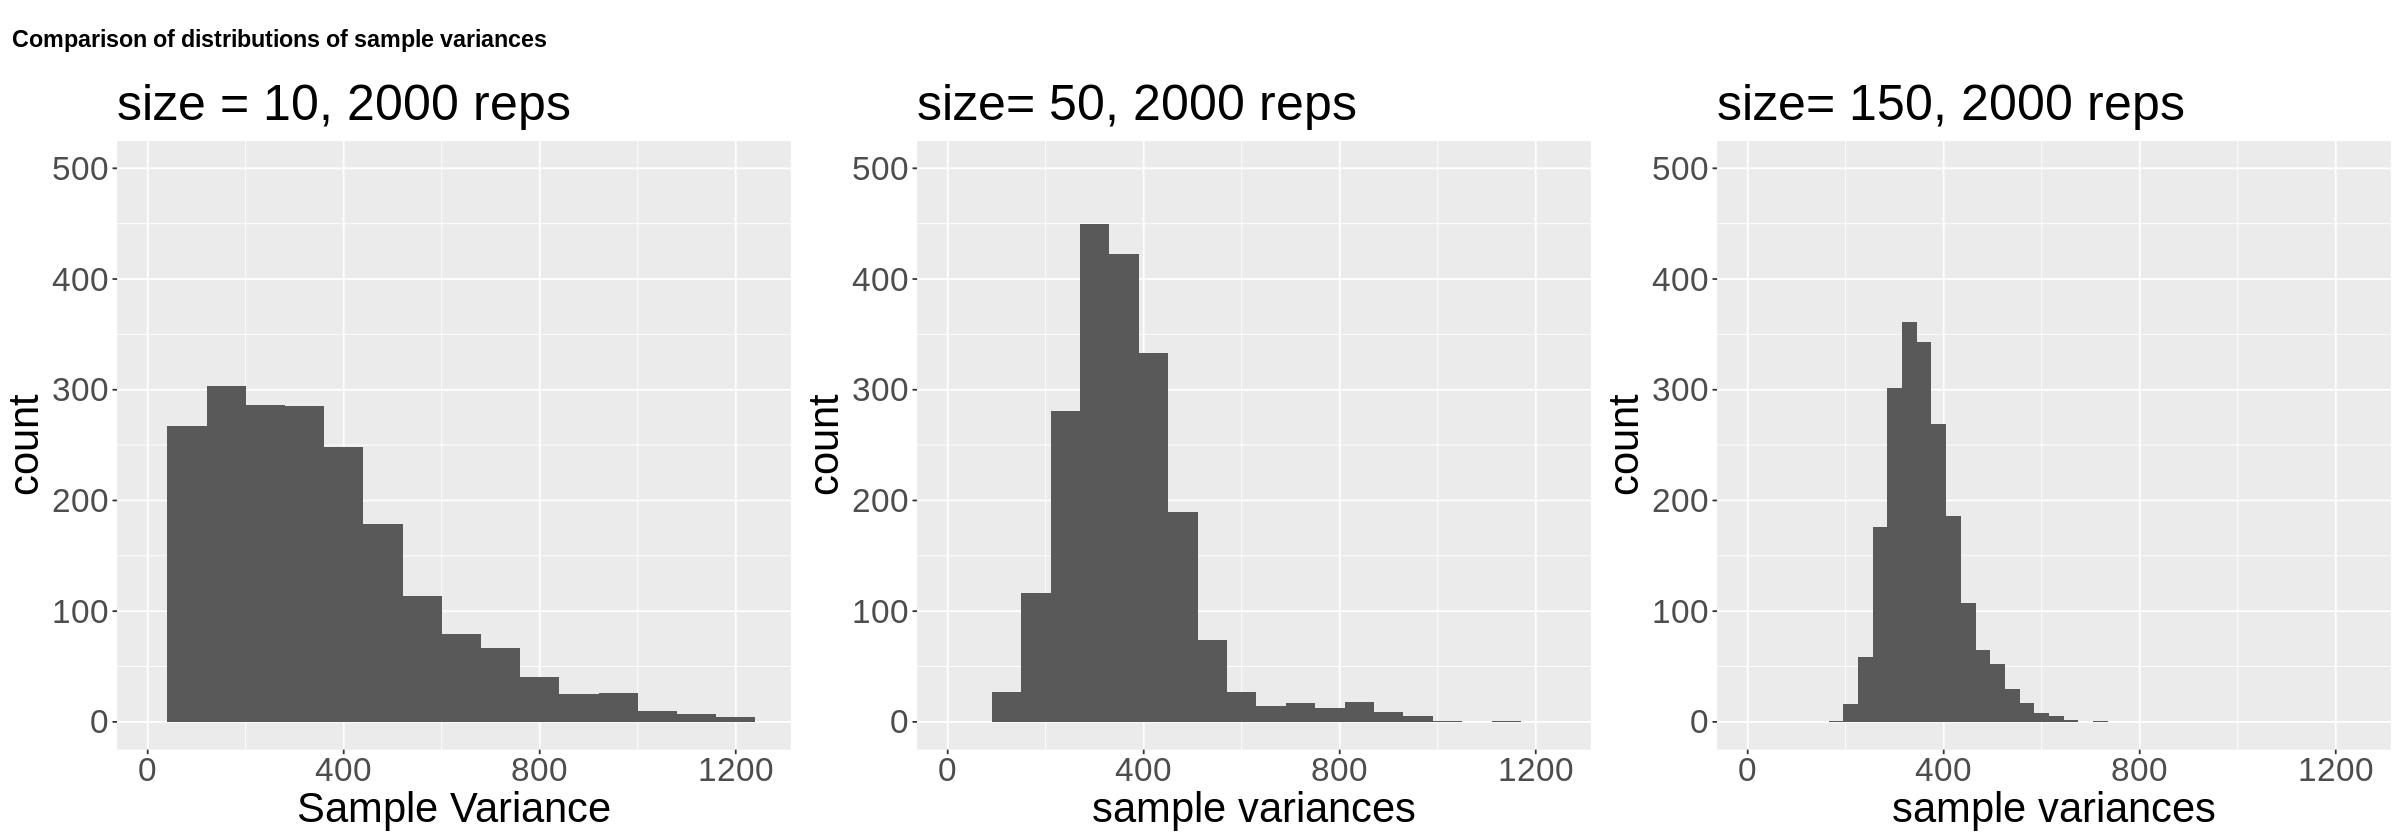

In [32]:
# Run this cell before continuing.
options(repr.plot.width = 20) # temp

var_plot_row <- plot_grid(sampling_dist_10x2000  + xlim(0, 1250) + ylim(0, 500)+ ylim(0, 500) + theme(text = element_text(size=25)),
                           sampling_dist_50x2000  + xlim(0, 1250) + ylim(0, 500) + ylim(0, 500) + theme(text = element_text(size=25)),
                           sampling_dist_150x2000 + xlim(0, 1250) + ylim(0, 500) + ylim(0, 500) + theme(text = element_text(size=25)),
                           ncol = 3)
title <- ggdraw() + 
  draw_label("Comparison of distributions of sample variances",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

vars_grid <- plot_grid(title,
                       var_plot_row,
                       ncol = 1,
                       rel_heights = c(0.1, 1))

vars_grid

**Question 2.7**
<br> {points: 3}

Given the three distributions of sample variances printed above, what can you say about the relationship(s) between sample size and the resulting distribution of sample variances (i.e. as the sample size changes, how does the distribution change)? Answer in 2-3 sentences in your own words.

As the sample size increases, the sampling distribution of variances becomes narrower and more pointy. It becomes more and more accurate. 

In the cell below, we have printed the true variance of the population. Use this value AND the sampling distribution printed above to answer the **next question**.

In [33]:
# Run this cell before continuing.
print(var(apt_ages$age_yrs))

[1] 364.0567


**Question 2.8**
<br> {points: 3}

What is similar between the three sampling distributions above? Answer in 1-2 sentences in your own words.

The similarity between the three sampling distributions is that they peak at around 360 to 400 mark. This implies that the variance is more likely to be in that range. The larger the size of the sample, the more acurate it gets

## 3. Influence of Sample Repetitions (the `reps` argument)

At this point, you should have a deep understanding of how sample size influences the sampling distributions of point estimates. However, as we hinted in the previous section, there is one more argument that we haven't tinkered with: the `reps` argument in `rep_sample_n`.

> To be clear, the `reps` argument describes the _number of samples_ that we take when calling `rep_sample_n`. The `replicate` column of the data frame returned by `rep_sample_n` describes which sample that observation is a member of. For example, if `reps = 10` and `size = 5`, then we will have $5 \times 10 = 50$ rows in the data frame produced by `rep_sample_n`, with `replicate` numbers ranging from 1 to 10, inclusive.

In this section, we are going to explore the relationship between the number of samples we take (sample repetitions) and the sampling distribution produced, while holding the sample size constant. To do this, we are going to use the same population as the last section (`apt_ages`: the age in years of apartments in Toronto that are registered in the Apartment Building Standard program).

**Question 3.0**
<br> {points: 1}

Consider the following code that takes a number of samples from `apt_ages`:
```r
samples <- apt_ages %>% 
    rep_sample_n(size = 15, reps = 2000)
```

And, suppose one row of the resulting `samples` data frame appears as follows:

| replicate | age_yrs |
| --------- | ------- |
| 201       | 15      |

Given the code above, which of the following statements is true about this individual row taken from `samples`?

A. This is the 201st observation sampled from `apt_ages`.

B. This is the 15th observation sampled from `apt_ages`.

C. This observation is a member of the 201st sample taken from `apt_ages`.

D. This observation is a member of the 15th sample taken from `apt_ages`.

_Assign your answer to an object called `answer3.0`. Your answer should be a single character surrounded by quotes._

In [40]:
# answer3.0 <- ...

# your code here
answer3.0 <- "C" 

In [41]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer3.0"', {
  expect_true(exists("answer3.0"))
})

test_that('Solution should be a single character ("A", "B", "C", or "D")', {
  expect_match(answer3.0, "a|b|c|d", ignore.case = TRUE)
})

**Question 3.1**
<br> {points: 1}

Use the `rep_sample_n` function to take 1000 samples of size 20 from the population `apt_ages`. Use the seed `3448`. Then, calculate the variance of each sample; name the column containing the sample variances `sample_var`.

_Assign your data frame to an object called `sample_vars_20x1000`._

In [44]:
set.seed(3448) # DO NOT CHANGE!

# your code here
sample_vars_20x1000 <- 
        apt_ages %>%
        rep_sample_n(size= 20, reps=1000) %>%
        group_by(replicate) %>%
        summarize(sample_var=var(age_yrs))
head(sample_vars_20x1000)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_var
<int>,<dbl>
1,217.1684
2,435.2079
3,526.3579
4,291.6421
5,312.3658
6,133.8316


In [45]:
test_3.1()

[1] "Success!"


**Question 3.2**
<br> {points: 1}

Visualize the distribution of the sample variances that you calculated in the previous question by plotting a histogram with bin widths of 5 using `geom_histogram`. Add a title of "size = 20, 1000 reps" to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `sampling_dist_20x1000`._

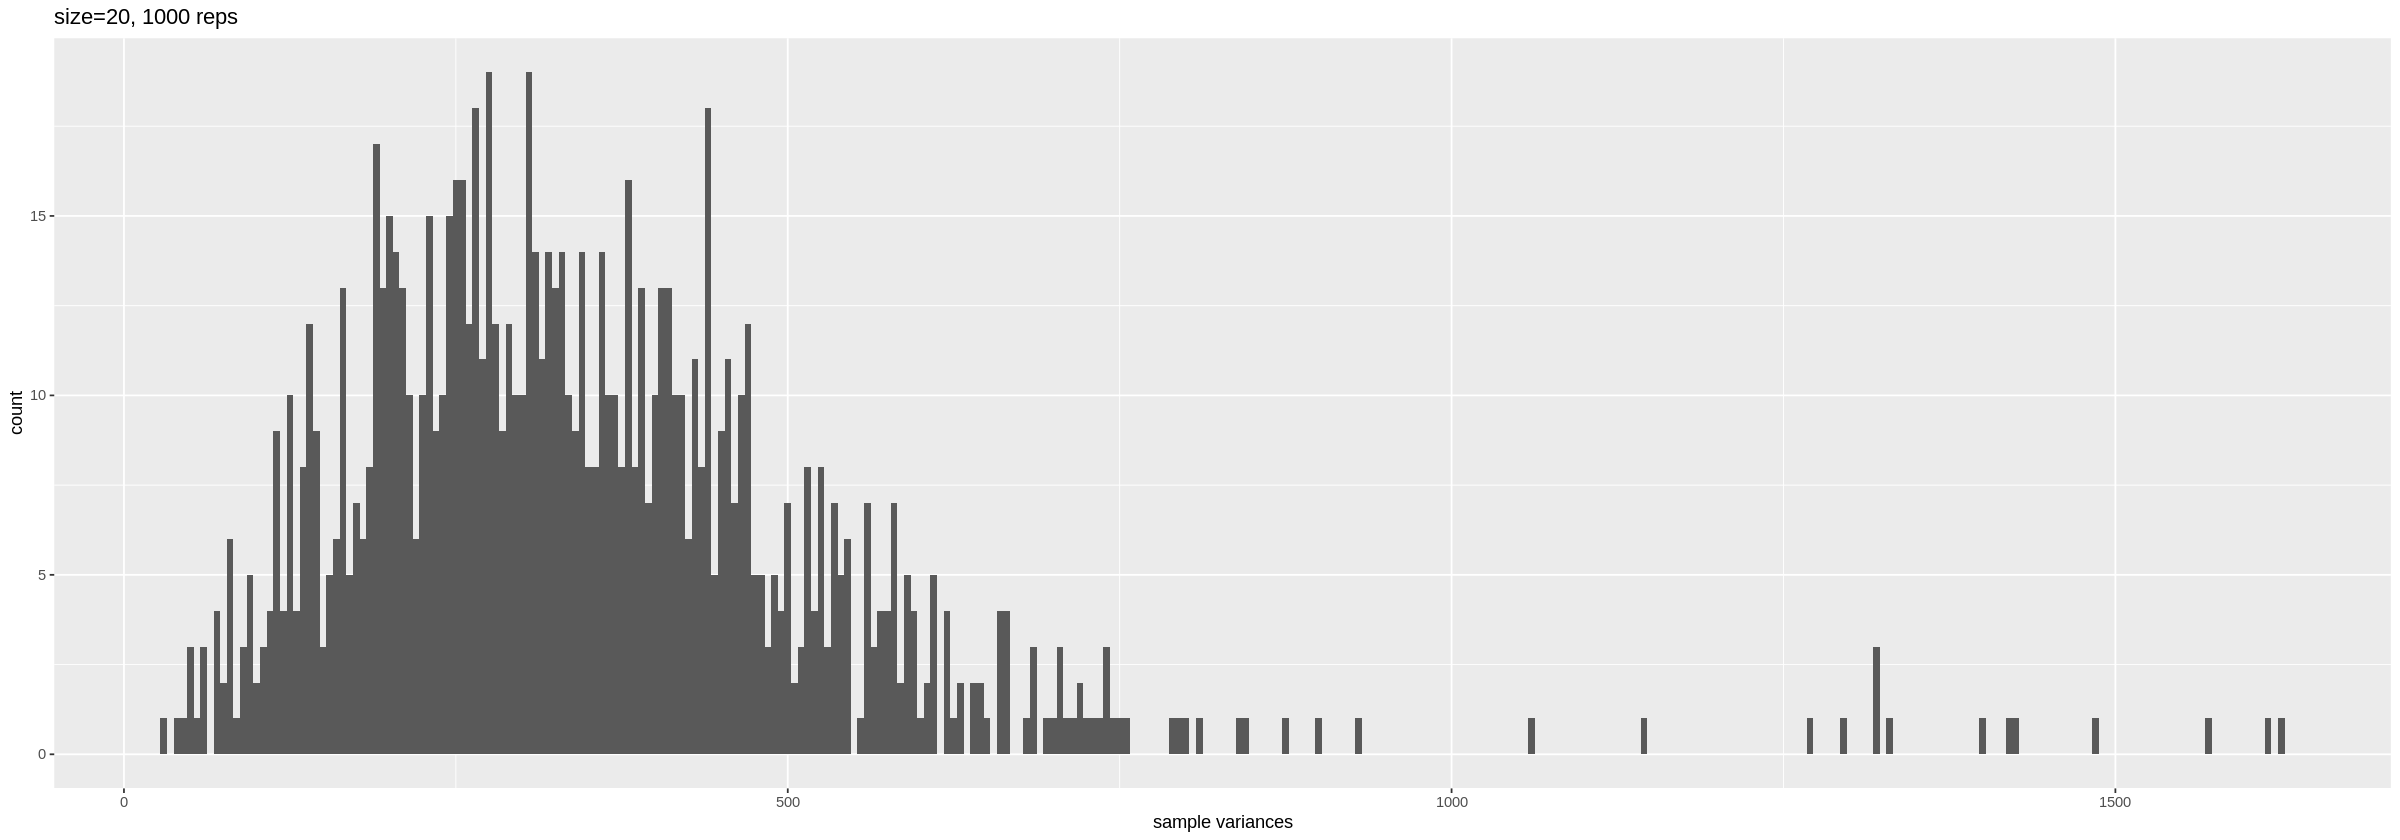

In [48]:
# your code here
sampling_dist_20x1000 <- 
    sample_vars_20x1000 %>%
    ggplot(aes(x=sample_var)) +
    geom_histogram(binwidth=5) +
    ggtitle('size=20, 1000 reps')+
    xlab("sample variances")

sampling_dist_20x1000

In [49]:
test_3.2()

[1] "Success!"


**Question 3.3**
<br> {points: 1}

Using the same strategy as you did in **question 3.1**, draw 5000 random samples of size 20 from the population `apt_ages`. Use the seed `7631`. Then, for each sample, calculate the variance. Finally, visualize the distribution of the sample variances you just calculated by plotting a histogram with bin widths of 5 using `geom_histogram`. Add a title of "size = 20, 5000 reps" to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_**Hint:** you can use the code from the previous section as a framework for your code here!_

_Assign your plot to an object called `sampling_dist_20x5000`._

`summarise()` ungrouping output (override with `.groups` argument)



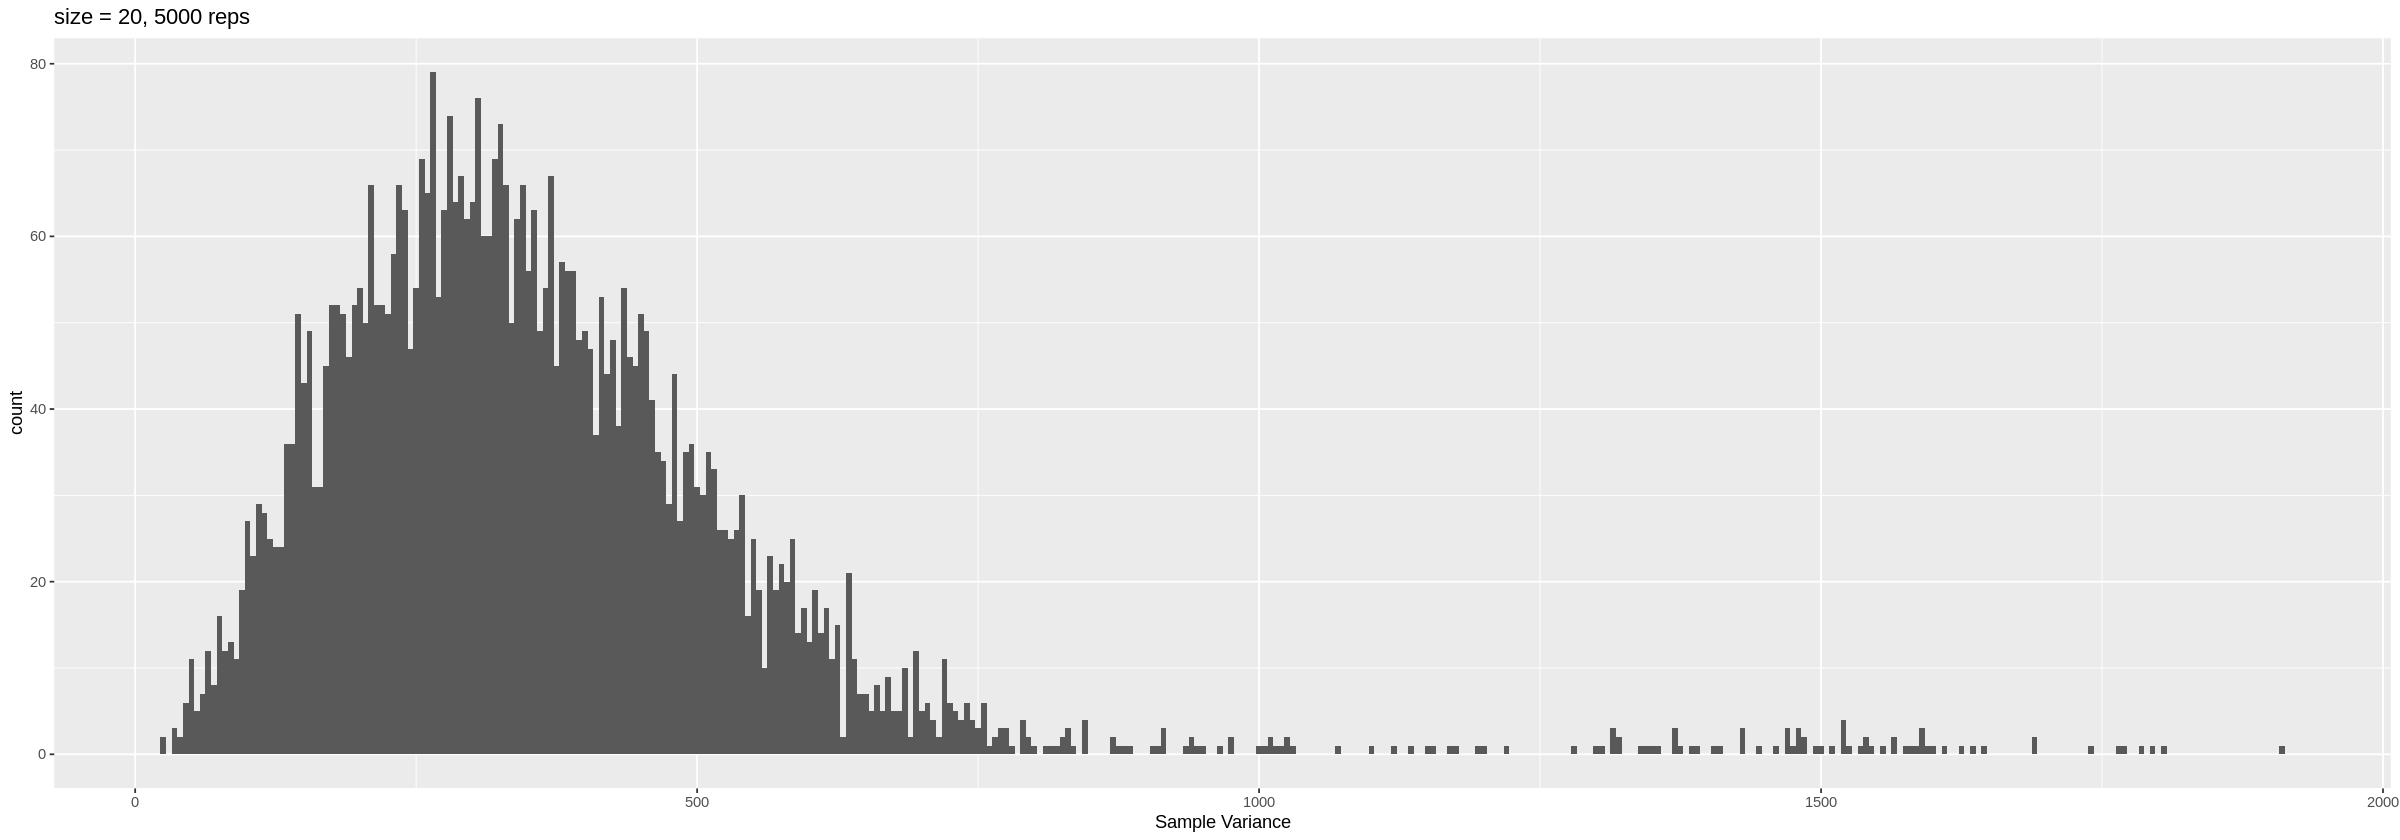

In [53]:
set.seed(7631)

# your code here
sampling_dist_20x5000 <- 
    apt_ages %>%
    rep_sample_n(size=20, reps=5000) %>%
    group_by(replicate) %>%
    summarize(sample_var=var(age_yrs)) %>%
    ggplot(aes(x=sample_var))+
    geom_histogram(binwidth=5)+
    ggtitle("size = 20, 5000 reps") +
    xlab("Sample Variance")

sampling_dist_20x5000

In [ ]:
test_3.3()

**Question 3.4**
<br> {points: 1}

Using the same strategy as you did in **question 3.1**, draw 20000 random samples of size 20 from the population `apt_ages`. Use the seed `3695`. Then, for each sample, calculate the variance. Finally, visualize the distribution of the sample variances you just calculated by plotting a histogram with bin widths of 5 using `geom_histogram`. Add a title of "size = 20, 20000 reps" to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_**Hint:** you can use the code from the previous section as a framework for your code here!_

_Assign your plot to an object called `sampling_dist_20x20000`._

`summarise()` ungrouping output (override with `.groups` argument)



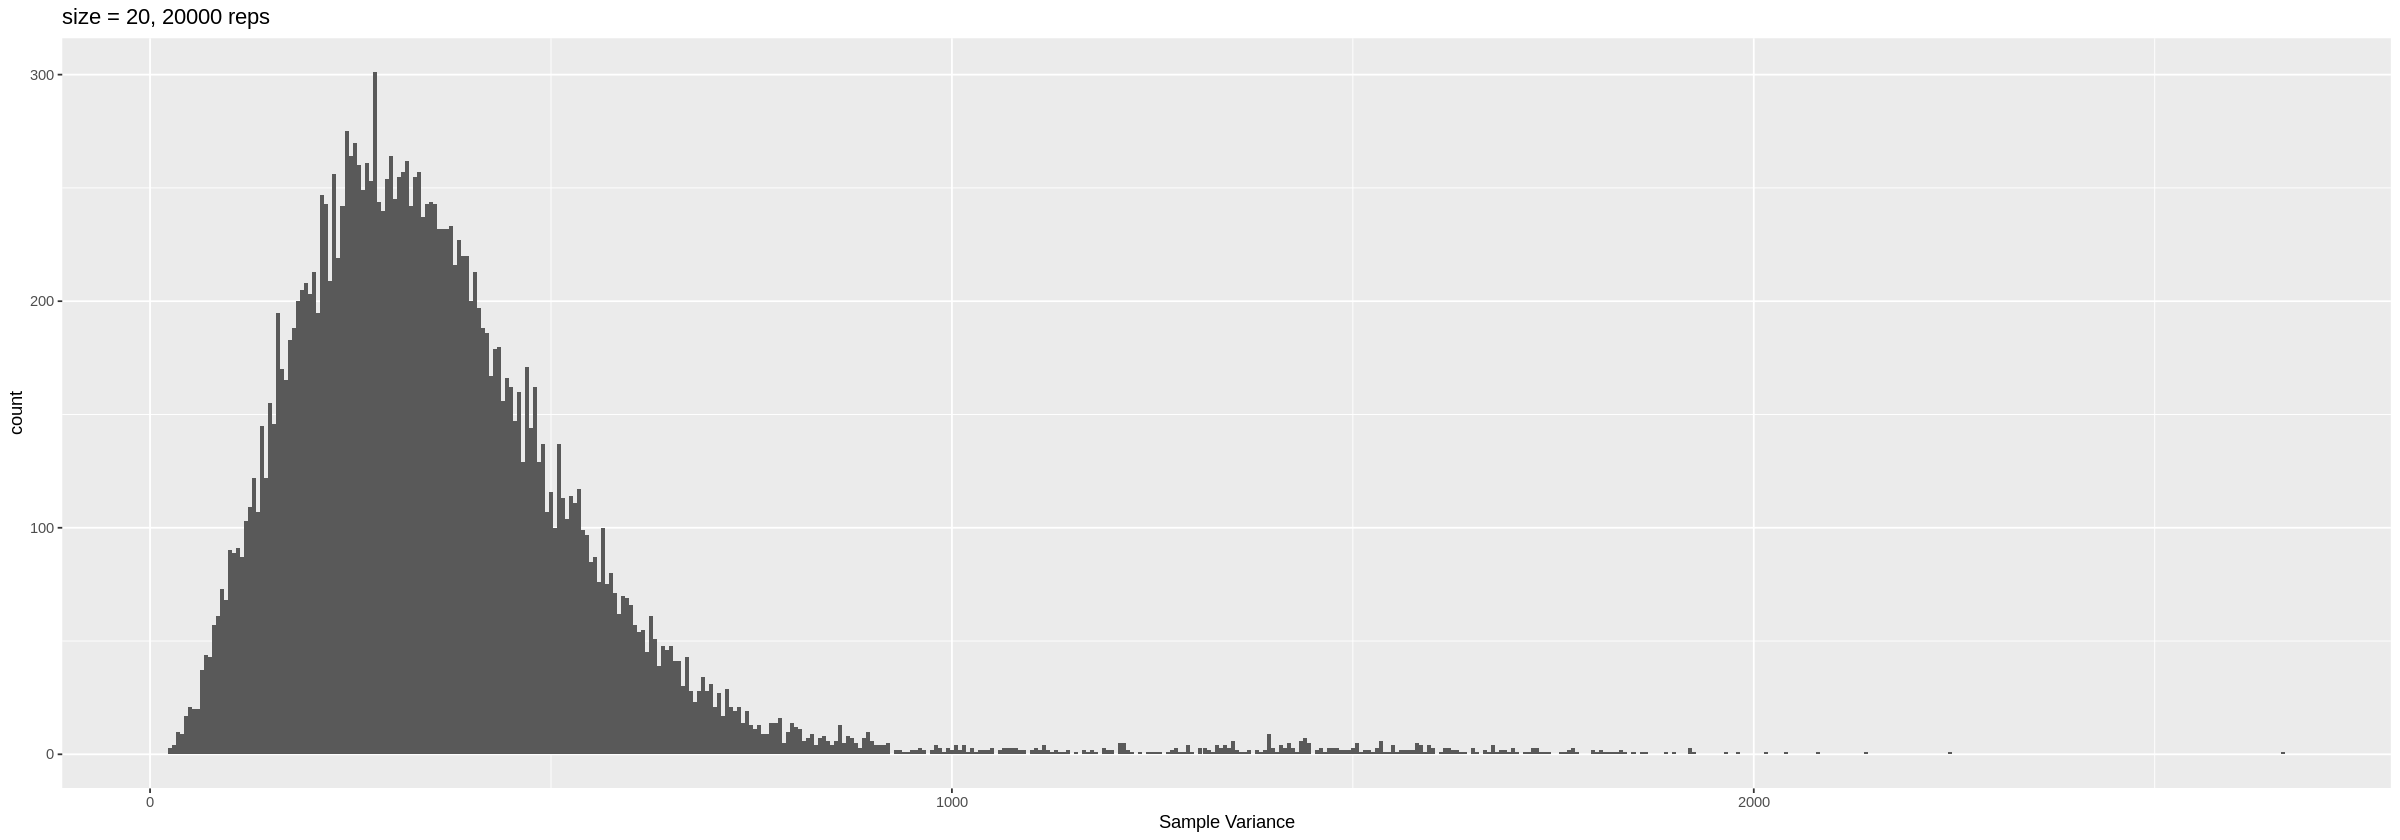

In [55]:
set.seed(3695)

# your code here
sampling_dist_20x20000 <-
    apt_ages %>%
    rep_sample_n(size=20, reps=20000) %>%
    group_by(replicate) %>%
    summarize(sample_var=var(age_yrs)) %>%
    ggplot(aes(x=sample_var))+
    geom_histogram(binwidth=5)+
    ggtitle("size = 20, 20000 reps") +
    xlab("Sample Variance")

sampling_dist_20x20000

In [56]:
test_3.4()

[1] "Success!"


_Use the set of plots below to answer the **next question**. Some of the code may be confusing, but you do not need to understand the code to answer the question._

In the code cell below, we have used `plot_grid` to plot the three sampling distributions side-by-side. We have sorted the plots by increasing order of sample repetitions from top to bottom.

**Note**: a small number of the sample variances are not visible because we manually set bounds on the x-axis so you can compare the distributions more easily (this causes the warnings you observe below).

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 34 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 135 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


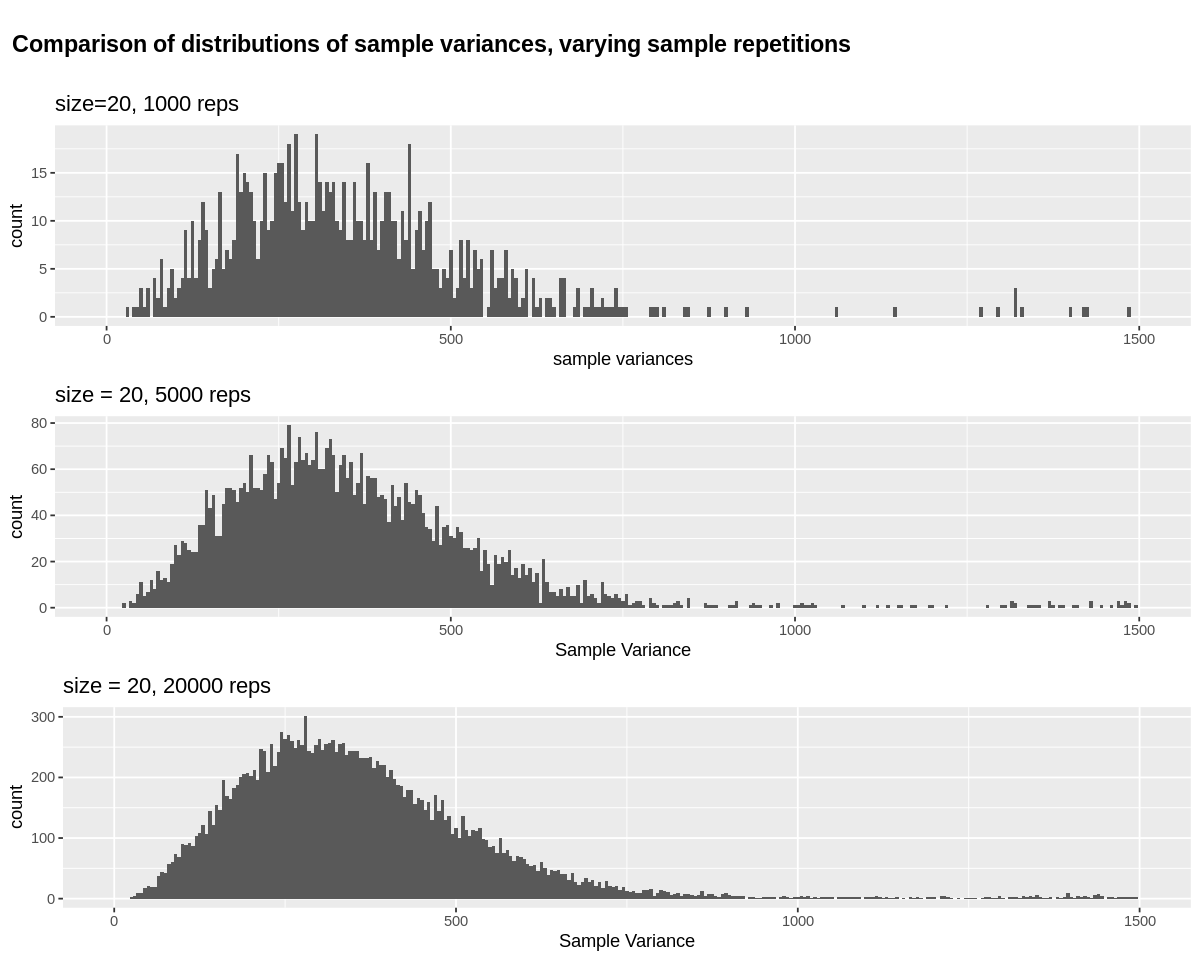

In [57]:
# Run this cell before continuing.
options(repr.plot.width = 10, repr.plot.height = 8) # temp

var_plot_col <- plot_grid(sampling_dist_20x1000  + xlim(0, 1500),
                          sampling_dist_20x5000  + xlim(0, 1500),
                          sampling_dist_20x20000 + xlim(0, 1500),
                          ncol = 1)
title <- ggdraw() + 
  draw_label("Comparison of distributions of sample variances, varying sample repetitions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

vars_grid <- plot_grid(title,
                       var_plot_col,
                       ncol = 1,
                       rel_heights = c(0.1, 1))

vars_grid

**Question 3.5**
<br> {points: 3}

**Note:** the bin widths for the histograms above are _significantly_ smaller than the bin widths for the histograms produced in section 2 so we can see the effects of number of sampling repetitions clearly.

How does the sampling distribution change as we increase the number of sampling repititions?

The sampling distribution becomes more and more curvy and compact as we increase the sampling repititions. It seems as if when we increase the sampling repititions drastically, the distribution will look more like a continous curved line.

_Use the plot below to answer the **next 2 questions**._

Below is a picture of a sampling distribution (displayed a histogram with **bin widths of 2**) that was produced by taking **20 million samples** of size 20 from `apt_ages` using `rep_sample_n`. This is an extreme example to further demonstrate the effects of the number of sample repetitions on the resulting sample distribution:

<img src="smooth_plot.png" style="width: 500px;"/>

> <font color='red'><font size = 3>**WARNING!**</font>: Do **NOT** attempt to take this many samples on your own inside this notebook **OR ANY OTHER NOTEBOOK** located on the JupyterHub that we use for STAT 201.

**Question 3.6**
<br> {points: 3}

Why don't we always take a large number of samples when exploring sampling distributions so we can get a nice, smooth distribution like the one shown above?

A. Taking a large number of samples is computationally expensive.

B. We may not always have enough data to draw such a large number of samples.

C. We can get a good approximation of the "smoother" sampling distribution by using less sample repetitions, but larger bin widths in our histogram.

D. All of the above.

E. A and B only.

F. A and C only.

G. B and C only.

H. None of the above.

_Assign your answer to an object called `answer3.6`. Your answer should be a single character surrounded by quotes._

In [64]:
# answer3.6 <- ...

# your code here
answer3.6 <- "F"

In [65]:
test_3.6()

[1] "Success!"


**Question 3.7**
<br> {points: 3}

True or false?

The sampling distribution displayed below is a good approximation of the smooth sampling distribution pictured above.

**Note:** the sampling distribution below was generated using 2000 samples of size 20 and bin widths of 45.

_Assign your answer to an object called `answer3.7`. Your answer should be either "true" or "false", surrounded by quotes._

`summarise()` ungrouping output (override with `.groups` argument)



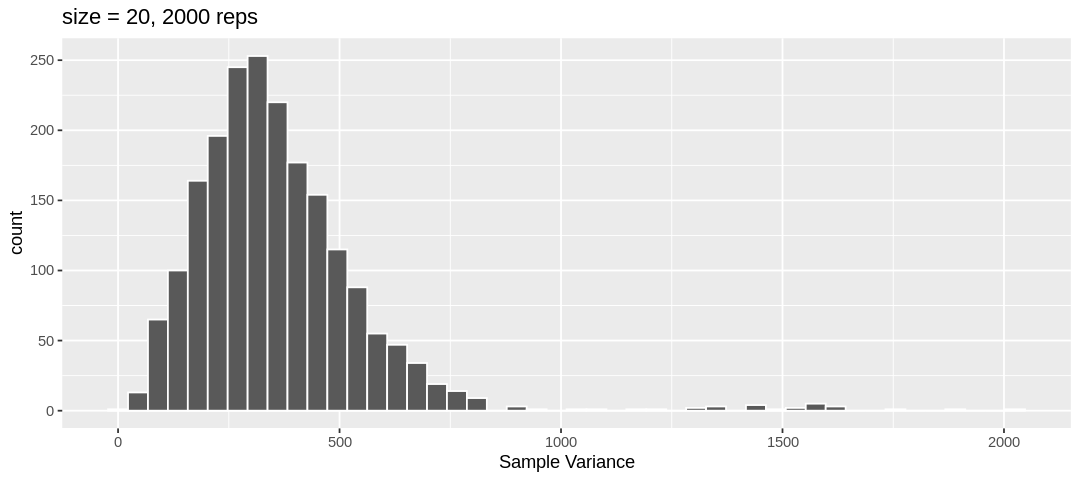

In [66]:
# NOTE: perhaps convert this plot to a picture to hide the code?
options(repr.plot.width = 9, repr.plot.height = 4) # temp
set.seed(4746)

apt_ages %>% 
    rep_sample_n(size = 20, reps = 2000) %>% 
    group_by(replicate) %>% 
    summarise(sample_var = var(age_yrs)) %>% 
    ggplot(aes(x = sample_var)) + 
    geom_histogram(binwidth = 45, color = 'white') +
    ggtitle("size = 20, 2000 reps") +
    xlab("Sample Variance")

In [67]:
# answer3.7 <- ...

# your code here
answer3.7 <- "true"

In [68]:
test_3.7()

[1] "Success!"


## 4. Distributions

So far, in this course, we have looked at many different distributions, each of which falls into one of three different categories:

1. Population distributions
2. Sample distributions
3. Sampl**_ing_** distributions (of an estimator)

In this section, we are going to revisit the definitions of each distribution and explore the relationships between them using `apt_buildings` dataset that we introduced at the start of this tutorial. However, this time we will look at the `no_of_storeys` variable and parameters relating to the centre of the population; the median and the mean.

In the code cell below, we have selected only the `no_of_storeys` column and saved the result to a data frame named `apt_storeys` for your convenience; we will define this as our population for this section.

In [70]:
apt_storeys <- apt_buildings %>% 
    select(no_of_storeys)

**Question 4.0**
<br> {points: 3}

Visualize the population distribution by creating a histogram with bin widths of 2 using `geom_histogram`. Add a title to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `apt_storeys_dist`._

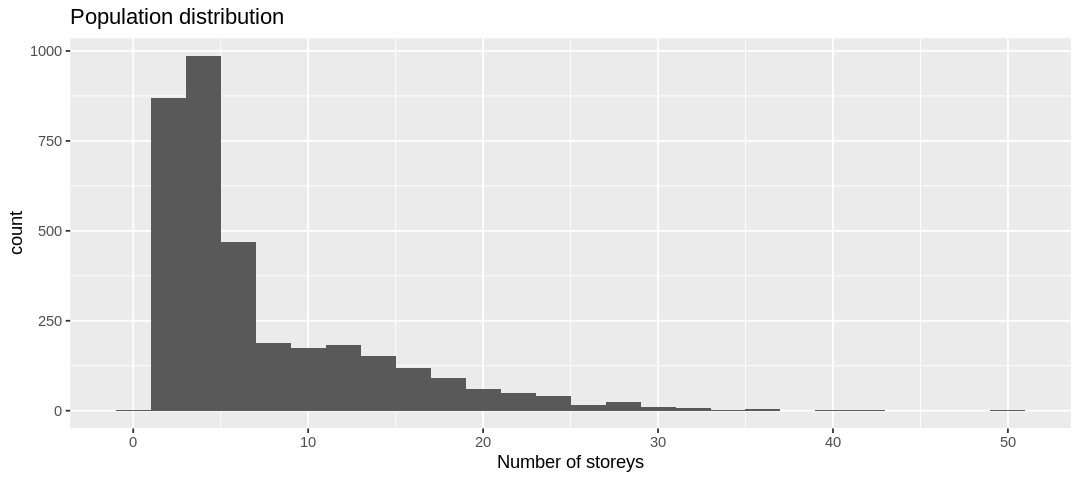

In [74]:
# your code here
apt_storeys_dist <-
    apt_storeys %>%
    ggplot(aes(x=no_of_storeys))+
    geom_histogram(binwidth=2)+
    ggtitle("Population distribution")+
    xlab("Number of storeys")
    


apt_storeys_dist

In [75]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "apt_storeys_dist"', {
  expect_true(exists("apt_storeys_dist"))
})

**Question 4.1**
<br> {points: 3}

Considering the population `apt_storeys` and the population distribution you created in **question 4.0**, which pair of distributions from the following list would you expect to have the **most** similar characteristics?

1. Population distribution of `apt_storeys`
2. Sample distribution generated using a sample of size 15 from `apt_storeys`
3. Sample distribution generated using a sample of size 283 from `apt_storeys`
4. Sampling distribution of sample medians generated using samples of size 9 and 200,000 sample repetitions from `apt_storeys`
5. Sampling distribution of sample means (generated using samples of size 175 and 200,000 sample repetitions from `apt_storeys`

A. 1 & 2

B. 1 & 3

C. 1 & 4

D. 1 & 5

E. 2 & 3

F. 4 & 5

G. There is not enough information to answer the question.

_Assign your answer to an object called `answer4.1`. Your answer should be a single character surrounded by quotes._

In [76]:
# answer4.1 <- ...

# your code here
answer4.1 <- "G"

In [77]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer4.1"', {
  expect_true(exists("answer4.1"))
})

test_that('Solution should be a single character ("A", "B", "C", "D", "E", "F", or "G")', {
  expect_match(answer4.1, "a|b|c|d|e|f|g", ignore.case = TRUE)
})

**Question 4.2**
<br> {points: 3}

True or false?

As you increase the sample size used to generate a sample distribution, the variance of the distribution will decrease.

_Assign your answer to an object called `answer4.2`. Your answer should be either "true" or "false", surrounded by quotes._

In [78]:
# answer4.2 <- ...

# your code here
answer4.2 <- "true"

In [79]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer4.2"', {
  expect_true(exists("answer4.2"))
})

test_that('Answer should be "true" or "false"', {
  expect_match(answer4.2, "true|false", ignore.case = TRUE)
})

**Question 4.3**
<br> {points: 3}

**Note:** this question has two parts!

a) Take a single sample from `apt_storeys` of size 100 using the `rep_sample_n` function and a seed of 4524.

_Assign your data frame to an object called `sample`._

<br>

b) Afterwards, visualize the distribution of the sample by creating a histogram with bin widths of 2 using `geom_histogram`. Additionally, add the argument `boundary = 0` to `geom_histogram` to force the histogram bars to start at 0 on the x-axis. Finally, add a title to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `sample_dist`._

replicate,no_of_storeys
<int>,<dbl>
1,4
1,14
1,4
1,9
1,8
1,5


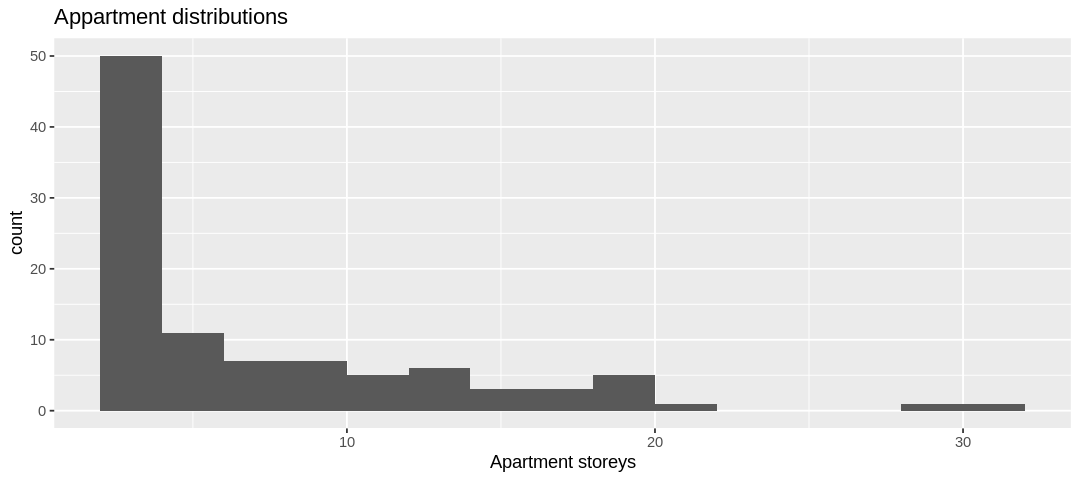

In [87]:
set.seed(4524)

# your code here
sample <- apt_storeys %>%
    rep_sample_n(size=100)
head(sample)
sample_dist <- sample %>%
    ggplot(aes(x=no_of_storeys)) +
    geom_histogram(binwidth= 2, boundary=0)+
    ggtitle("Appartment distributions")+
    xlab("Apartment storeys")
sample_dist

In [88]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "sample"', {
  expect_true(exists("sample"))
})

test_that('Did not assign answer to an object called "sample_dist"', {
  expect_true(exists("sample_dist"))
})

**Question 4.4**
<br> {points: 3}

**Note:** this question has two parts!

a) Calculate the **mean** of the sample you took in **question 3.3** (`sample`).

_Assign your answer to an object called `sample_mean`. Your answer should be a single number._

<br>

b) Calculate the **median** of the sample you took in **question 3.3** (`sample`).

_Assign your answer to an object called `sample_median`. Your answer should be a single number._

<font color='dodgerblue'> **Hint:** you can convert a 1x1 dataframe to a single number using the `as.numeric()` function!

In [95]:
# your code here
sample_mean <- mean(sample$no_of_storeys)
sample_mean

sample_median <- median(sample$no_of_storeys)
sample_median


[1] 7.65

[1] 4.5

In [96]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "sample_mean"', {
  expect_true(exists("sample_mean"))
})
test_that("Solution should be a number", {
  expect_false(is.na(as.numeric(sample_mean)))
})

test_that('Did not assign answer to an object called "sample_median"', {
  expect_true(exists("sample_median"))
})
test_that("Solution should be a number", {
  expect_false(is.na(as.numeric(sample_median)))
})

_Use the value of `sample_mean` and `sample_median` to answer the **next 2 questions**._

**Question 4.5**
<br> {points: 3}

Assume the sample you took in **question 4.3**, `sample`, was one out of many samples taken from `apt_storeys` and used to generate one of the sampling distributions below.

Given that each was generated using 1000 sample replicates, which histogram below represents a sampling distribution of sample means that **most likely** contains a point estimate from `sample`?

<img src="question4.5.png"/>

_Assign your answer to an object called `answer4.5`. Your answer should be a single character surrounded by quotes._

In [97]:
# answer4.5 <- ...

# your code here
answer4.5 <- "B"

In [98]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer4.5"', {
  expect_true(exists("answer4.5"))
})

test_that('Solution should be a single character ("A", "B", "C", or "D")', {
  expect_match(answer4.5, "a|b|c|d", ignore.case = TRUE)
})

**Question 4.6**
<br> {points: 3}

Consider the following two distributions:
1. Sampling distribution of sample means of `apt_storeys`, generated using 50,000 samples of size 250
2. Sampling distribution of sample medians of `apt_storeys`, generated using 50,000 samples of size 250

Given the values of `sample_mean` and `sample_median`, what should you expect about the position of the mean of distribution 2 in comparison to the mean of distribution 1?

The mean distribution of 2 should be lesser than the mean distribution of 1.

## 5. The Reality of Sampling

If you recall from the last worksheet, there were two important points that we should have in the back of our minds as we learn about sampling and sampling distributions:
> First, you must acknowledge that we don't usually have access to data for the entire population that we are interested in like we have so far. If we did, we could always calculate the population parameter directly. Here, we are taking the opportunity of having access to these entire populations to study sampling distributions. Second, always remember the purpose of learning about sampling distributions. By learning about the properties of sampling distributions, you will be able to understand the inherent variability/error in point estimates. This "error" associated with a point estimate is critical, and in later weeks we will learn how to report it formally.

So, what happens when we don't have access to the entire population? In this section, we'll take a look at two different point estimates, compare them, and introduce ourselves to the problem that we will be able to address next week.

_Use the following scenario to answer the next **3 questions**._

Suppose you are interested in determining the median height of all students at UBC. You do not have the resources to perform a census or take a large number of samples. You end up gathering two different samples and compute a point estimate of the median for each sample. The details of each point estimate are as follows:

1. Using a sample size of 42, you calculate a sample median of 175.3cm (or around 5' 9"). You are certain that the sample is unbiased and representative of the population.
2. Using a sample size of 7, you calculate a sample median of 167.6cm (or around 5' 6"). You are certain that the sample is unbiased and representative of the population.

**Question 5.0**
<br> {points: 1}

Which point estimate has a **higher chance** of being closer to the true median of all students at UBC?

A. Point estimate 1

B. Point estimate 2

_Assign your answer to an object called `answer5.0`. Your answer should be a single character surrounded by quotes._

In [103]:
# answer5.0 <- ...

# your code here
answer5.0 <- "A"

In [104]:
test_5.0()

[1] "Success!"


**Question 5.1**
<br> {points: 1}

True or false?

One potential justification for the correct answer to the previous question could be: the standard deviation of the sampling distribution containing the first point estimate is larger than the standard deviation of the sampling distribution containing the second point estimate.

_Assign your answer to an object called `answer5.1`. Your answer should be either "true" or "false", surrounded by quotes._

In [107]:
# answer5.1 <- ...

# your code here
answer5.1 <- "false"

In [108]:
test_5.1()

[1] "Success!"


**Question 5.2**
<br> {points: 1}

Given what you have learned so far in this course and the scenario described above, how could you **quantify** the sampling variance of the two different samples?

A. Take many more samples of size 42 and size 7 and compute the standard error of each sampling distribution.

B. Estimate the standard error by computing the standard deviation of the two samples.

C. There does not seem to be a way to do this using the techniques we have learned so far in this course. However, there must be some way to do this using a single sample. Perhaps we will learn about how to do this next week _(hint: you will)_.

D. None of the above.

_Assign your answer to an object called `answer5.2`. Your answer should be a single character surrounded by quotes._

In [113]:
# answer5.2 <- ...

# your code here
answer5.2 <- "C"

In [114]:
test_5.2()

[1] "Success!"
